<a href="https://colab.research.google.com/github/swethasrihari/privacy-project-team1/blob/main/privacy_project_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
import pandas as pd
path ='/content/drive/MyDrive/Colab Notebooks/Privacy_Project/adult.csv'


In [80]:
data = pd.read_csv(path)


In [81]:
print(data.head())
print(data.shape)

   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0             0   
2    Protective-serv      Husband  White    Male             0             0   
3  Machine-op-inspct      Husband  Black    Male          7688             0   
4                  ?    Own-child  White  Female             0             0   

   hours-per-week native-country incom

In [82]:
# in this dataset, the cells with no values are represented as ?. Here we want to find how many missing values are in this dataset.
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
2799
5.73%


occupation
2809
5.75%


native-country
857
1.75%




In [83]:
# data cleaning, removing the data with ? as their value
data = data[data["workclass"] != "?"]
data = data[data["occupation"] != "?"]
data = data[data["native-country"] != "?"]

data.shape
#df_cleaned = pd.DataFrame(data)
#df_cleaned.to_csv('/content/drive/MyDrive/Colab Notebooks/Privacy_Project/cleanedAdultIncome.csv')
#print(df_cleaned)

(45222, 15)

In [84]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [85]:
# we're taking only the predictor variables
# frequency for categorical fields
category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'gender', 'native-country', 'income']
for c in category_col:
    print (c)
    print (data[c].value_counts())

workclass
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
race
White                 38903
Black                  4228
Asian-Pac-Islander     1303
Amer-Indian-Eskimo      435
Other                   353
Name: race, dtype: int64
education
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64
marital-status
Married-civ-spouse       21055
Never-married            14598
Divorced                  6297
Separated                 1411
Widowed                   1277
Married-spouse-absent      552
Married-AF-spou

In [86]:
# here we can see that the income classes are not balanced.
print(data["income"].value_counts()[0] / data.shape[0])
print(data["income"].value_counts()[1] / data.shape[0])


0.7521560302507629
0.2478439697492371


In [87]:
# replace the categorical columns using numbers
data.replace(['Divorced', 'Married-AF-spouse',
              'Married-civ-spouse', 'Married-spouse-absent',
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)

In [88]:
import numpy as np
for col in category_col:
    b, c = np.unique(data[col], return_inverse=True)
    data[col] = c

data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,1,7,1,6,3,2,1,0,0,40,38,0
1,38,2,89814,11,9,0,4,0,4,1,0,0,50,38,0
2,28,1,336951,7,12,0,10,0,4,1,0,0,40,38,1
3,44,2,160323,15,10,0,6,0,2,1,7688,0,40,38,1
5,34,2,198693,0,6,1,7,1,4,1,0,0,30,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,257302,7,12,0,12,5,4,0,0,0,38,38,0
48838,40,2,154374,11,9,0,6,0,4,1,0,0,40,38,1
48839,58,2,151910,11,9,1,0,4,4,0,0,0,40,38,0
48840,22,2,201490,11,9,1,0,3,4,1,0,0,20,38,0


In [89]:
from scipy import stats

col_names = data.columns

param=[]
correlation=[]
abs_corr=[]

for c in col_names:
    #Check if binary or continuous
    if c != "income":
        if len(data[c].unique()) <= 2:
            corr = stats.spearmanr(data['income'],data[c])[0]
        else:
            corr = stats.pointbiserialr(data['income'],data[c])[0]
        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))

#Create dataframe for visualization
param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})

#Sort by absolute correlation
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)

#Set parameter name as index
param_df=param_df.set_index('parameter')

param_df

,correlation,abs_corr
parameter,,
marital-status,-0.437678,0.437678
educational-num,0.332800,0.332800
relationship,-0.253402,0.253402
age,0.237040,0.237040
hours-per-week,0.227199,0.227199
capital-gain,0.221034,0.221034
gender,0.215760,0.215760
capital-loss,0.148687,0.148687
education,0.081196,0.081196


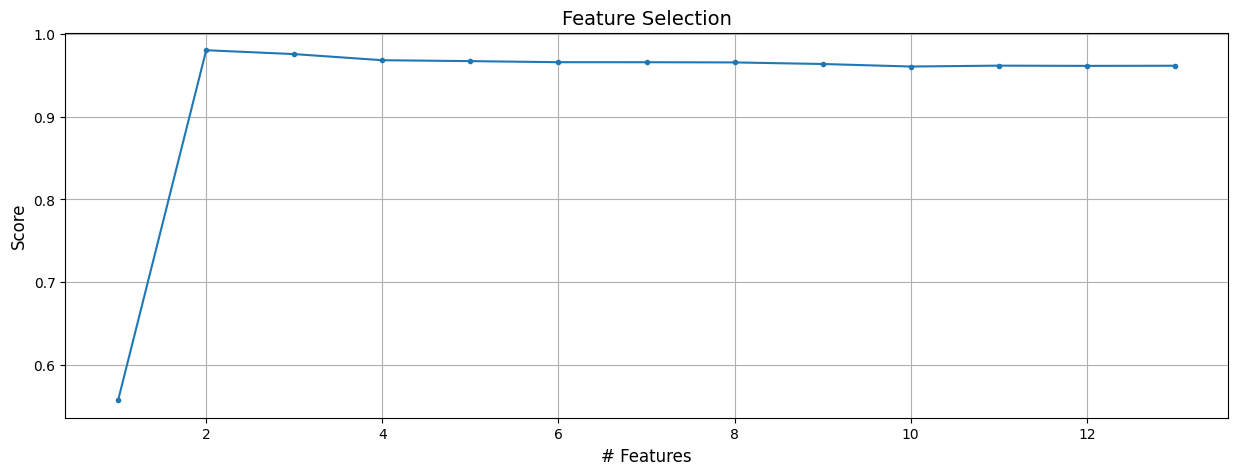

In [90]:
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
scoresCV = []
scores = []

for i in range(1,len(param_df)):
    new_df=data[param_df.index[0:i+1].values]
    X = new_df.iloc[:,1::]
    y = new_df.iloc[:,0]
    clf = DecisionTreeClassifier()
    scoreCV = cross_val_score(clf, X, y, cv= 10)
    scores.append(np.mean(scoreCV))

plt.figure(figsize=(15,5))
plt.plot(range(1,len(scores)+1),scores, '.-')
plt.axis("tight")
plt.title('Feature Selection', fontsize=14)
plt.xlabel('# Features', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.grid();

In [91]:
best_features=param_df.index[0:4].values
print('Best features:\t',best_features)

Best features:	 ['marital-status' 'educational-num' 'relationship' 'age']


In [92]:
#predictors = ['age','workclass','education','educational-num',
#              'marital-status', 'occupation','relationship','race','gender',
#              'capital-gain','capital-loss','hours-per-week', 'native-country']
#
#predictors = ['marital-status', 'educational-num', 'relationship', 'age']
predictors = ['gender','age','race','marital-status','education','educational-num','workclass','occupation','relationship']

high_income = data[data['income'] == 1]
low_income = data[data['income'] == 0]

# stratified sampling
#80% to train set
train = pd.concat([high_income.sample(frac=0.8, random_state=1),
                   low_income.sample(frac=0.8, random_state=1)])
y_train = train["income"]
X_train = train[predictors]

#10% to test set
test = pd.concat([high_income.sample(frac=0.1, random_state=1),
                  low_income.sample(frac=0.1, random_state=1)])
y_test = test["income"]
X_test = test[predictors]

#10% to Cross Validation set
cross = pd.concat([high_income.sample(frac=0.1, random_state=2),
                   low_income.sample(frac=0.1, random_state=2)])
y_cross = cross["income"]
X_cross = cross[predictors]

In [93]:
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [94]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Logistic Regression Classification Report")
print(report)

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3401
           1       0.66      0.47      0.55      1121

    accuracy                           0.81      4522
   macro avg       0.75      0.70      0.72      4522
weighted avg       0.80      0.81      0.80      4522



In [95]:
anonymizedPath='/content/drive/MyDrive/Colab Notebooks/Privacy_Project/Adult Income 5-Anonymized Distinct-2-Diverse.csv'
anonymizedData = pd.read_csv(anonymizedPath)

In [96]:
#for record in anonymizedData.values:
 # print(record)

In [97]:
anonymizedData.head()

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,Male,31-60,White,Undergraduate,13-Oct,Spouse Present,Husband,Private,White-Collar,>50K
1,Female,31-60,White,Undergraduate,13-Oct,Spouse Present,Wife,Private,White-Collar,>50K
2,Female,31-60,White,High School,9-Apr,Spouse Present,Wife,Private,White-Collar,<=50K
3,Female,31-60,White,Undergraduate,13-Oct,Spouse Not Present,Unmarried,Private,White-Collar,<=50K
4,Female,0-30,White,Graduate,14-16,Spouse Not Present,Own-child,Private,Blue-Collar,<=50K


In [98]:
category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'gender', 'educational-num', 'income','age','relationship']

In [99]:
import numpy as np
for col in category_col:
    b, c = np.unique(anonymizedData[col], return_inverse=True)
    anonymizedData[col] = c

anonymizedData.head()

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,1,1,1,3,0,1,0,0,1,1
1,0,1,1,3,0,1,5,0,1,1
2,0,1,1,2,3,1,5,0,1,0
3,0,1,1,3,0,0,4,0,1,0
4,0,0,1,1,1,0,3,0,0,0


In [100]:
def calculate_midpoint(age):
    lower_bound = int(age[1:3])
    upper_bound = int(age[4:7])
    midpoint = (lower_bound + upper_bound) / 2
    return midpoint

In [101]:
print(anonymizedData)

       gender  age  race  education  educational-num  marital-status  \
0           1    1     1          3                0               1   
1           0    1     1          3                0               1   
2           0    1     1          2                3               1   
3           0    1     1          3                0               0   
4           0    0     1          1                1               0   
...       ...  ...   ...        ...              ...             ...   
41046       1    1     1          2                3               1   
41047       1    1     0          2                3               0   
41048       1    1     1          2                3               1   
41049       1    1     0          2                3               0   
41050       1    0     1          2                3               0   

       relationship  workclass  occupation  income  
0                 0          0           1       1  
1                 5          

In [102]:
X_test = anonymizedData[predictors]

In [103]:
y_test=anonymizedData['income']

In [104]:
y_pred= reg.predict(X_test)

In [105]:
report1 = classification_report(y_test, y_pred)
print("Logistic Regression Classification Report - K Anonymized data")
print(report1)

Logistic Regression Classification Report - K Anonymized data
              precision    recall  f1-score   support

           0       0.73      1.00      0.84     29961
           1       0.00      0.00      0.00     11090

    accuracy                           0.73     41051
   macro avg       0.36      0.50      0.42     41051
weighted avg       0.53      0.73      0.62     41051



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
dpPoint5_path = '/content/drive/MyDrive/Colab Notebooks/Privacy_Project/Adult Income .5-Epsilon Differential.csv'
dpPoint5_data = pd.read_csv(dpPoint5_path)
dpPoint5_data.head()

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,Female,*,White,No Higher Education,1-9,Spouse Not Present,Not In Family,Public,*,<=50K
1,Female,*,White,Higher Education,10-16,Spouse Not Present,Not In Family,Private,*,<=50K
2,Female,*,White,Higher Education,10-16,Spouse Not Present,In Family,Private,*,<=50K
3,Female,*,Non-White,No Higher Education,1-9,Spouse Not Present,In Family,Private,*,<=50K
4,Male,*,White,No Higher Education,1-9,Spouse Present,In Family,Private,*,<=50K


In [107]:
for col in category_col:
    b, c = np.unique(dpPoint5_data[col], return_inverse=True)
    dpPoint5_data[col] = c

dpPoint5_data

,gender,age,race,education,educational-num,marital-status,relationship,workclass,occupation,income
0,0,0,1,1,0,0,1,1,0,0
1,0,0,1,0,1,0,1,0,0,0
2,0,0,1,0,1,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0
4,1,0,1,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
15280,1,0,1,1,0,1,0,0,0,0
15281,1,0,0,1,0,0,1,0,0,0
15282,1,0,1,1,0,0,0,0,0,0
15283,0,0,1,0,1,0,1,0,0,0


In [108]:
dpPoint5_X_test = dpPoint5_data[predictors]
dpPoint5_y_test = dpPoint5_data["income"]
dpPoint5_y_pred = reg.predict(dpPoint5_X_test)

In [109]:
dpPoint5_report = classification_report(dpPoint5_y_test, dpPoint5_y_pred)
print("Logistic Regression for DP epsilon- 0.5 Classification Report")
print(dpPoint5_report)

Logistic Regression for DP epsilon- 0.5 Classification Report
              precision    recall  f1-score   support

           0       0.77      1.00      0.87     11730
           1       0.00      0.00      0.00      3555

    accuracy                           0.77     15285
   macro avg       0.38      0.50      0.43     15285
weighted avg       0.59      0.77      0.67     15285



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
